In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"
# Read the table from the URL into a dataframe
df = pd.read_html(url)[0]

In [2]:
df.head()

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,NaN,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,NaN,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,NaN,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,NaN,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,NaN,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


#Questão 1

In [3]:
df['Status']

,Status
0,Developing
1,Developing
2,Developing
3,Developing
4,Developing
...,...
2456,Developing
2457,Developing
2458,Developing
2459,Developing


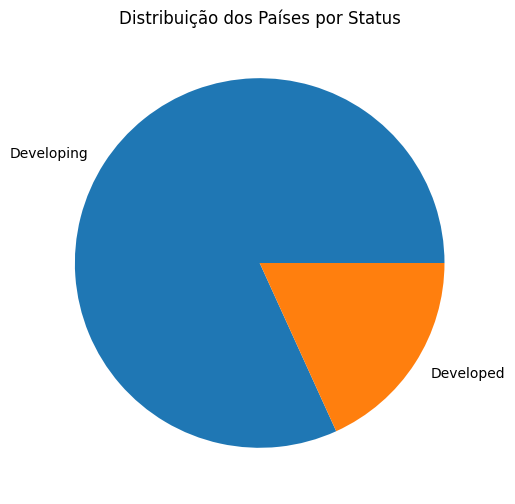

Porcentagem de países desenvolvidos: 18.20%


In [4]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index)
plt.title('Distribuição dos Países por Status')
plt.show()

porcentagem_desenvolvidos = (status_counts['Developed'] / status_counts.sum()) * 100
print(f"Porcentagem de países desenvolvidos: {porcentagem_desenvolvidos:.2f}%")

#Questão 2

In [5]:
df['Life_expectancy'].isna().sum()

0

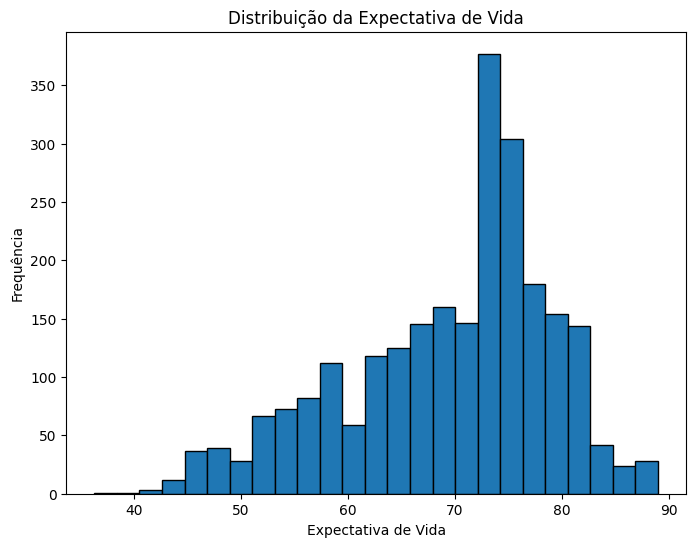

Média da Expectativa de Vida: 69.46
Variância da Expectativa de Vida: 92.92


In [6]:
plt.figure(figsize=(8, 6))
plt.hist(df['Life_expectancy'], bins=25, edgecolor='black')
plt.title('Distribuição da Expectativa de Vida')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frequência')
plt.show()

media = df['Life_expectancy'].mean()
variancia = df['Life_expectancy'].var()

print(f"Média da Expectativa de Vida: {media:.2f}")
print(f"Variância da Expectativa de Vida: {variancia:.2f}")

#Questão 3

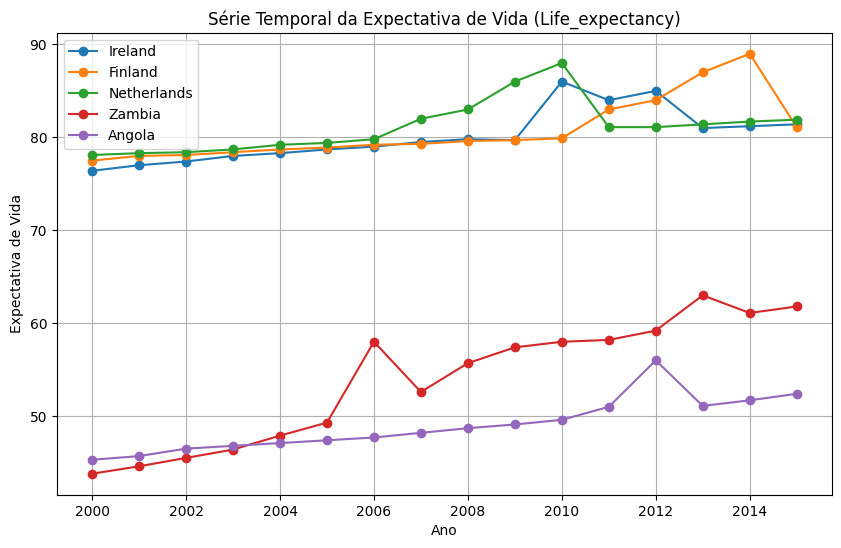

In [7]:
paises = ["Ireland", "Finland", "Netherlands", "Zambia", "Angola"]

df_paises = df[df['Country'].isin(paises)]

plt.figure(figsize=(10, 6))
for pais in paises:
    df_pais = df_paises[df_paises['Country'] == pais]
    plt.plot(df_pais['Year'], df_pais['Life_expectancy'], marker='o', label=pais)

plt.title('Série Temporal da Expectativa de Vida (Life_expectancy)')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida')
plt.legend()
plt.grid(True)
plt.show()

Com mais expectativa de vida em 2014, dentre os países selecionados, temos a Finlândia e, com menos, a Angola.

#Questão 4

<Figure size 1000x600 with 0 Axes>

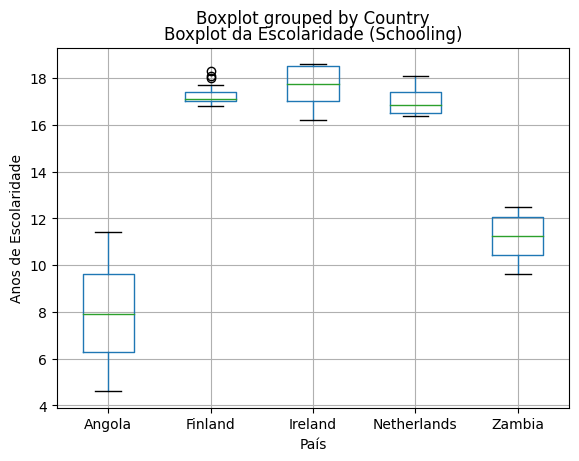

O país com a maior mediana de escolaridade é Ireland com 17.75 anos.


In [8]:
paises = ["Ireland", "Finland", "Netherlands", "Zambia", "Angola"]

df_paises = df[df['Country'].isin(paises)]

plt.figure(figsize=(10, 6))
df_paises.boxplot(column='Schooling', by='Country')
plt.title('Boxplot da Escolaridade (Schooling)')
plt.xlabel('País')
plt.ylabel('Anos de Escolaridade')
plt.show()

medianas = df_paises.groupby('Country')['Schooling'].median()

pais_maior_mediana = medianas.idxmax()
maior_mediana = medianas.max()

print(f"O país com a maior mediana de escolaridade é {pais_maior_mediana} com {maior_mediana:.2f} anos.")

#Questão 5

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://www.worldometers.info/world-population/population-by-country/"
# Send a GET request to the URL
response = requests.get(url)
# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table containing the population data
table = soup.find('table', {'id': 'example2'})
# Convert the table to a Pandas DataFrame
df = pd.read_html(str(table))[0]
# Print the DataFrame
df.head()

<ipython-input-9-8c253da1191b>:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %


In [10]:
df.columns

Index(['#', 'Country (or dependency)', 'Population  (2024)', 'Yearly  Change',
       'Net  Change', 'Density  (P/Km²)', 'Land Area  (Km²)',
       'Migrants  (net)', 'Fert.  Rate', 'Med.  Age', 'Urban  Pop %',
       'World  Share'],
      dtype='object')

In [11]:
df.drop(columns=['#', 'Country (or dependency)'])

,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...
229,4389,-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,3470,-0.20 %,-7,0,12170,-13,1.7,42,68 %,0.00 %
231,2506,4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,1819,0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


In [12]:
df['Urban  Pop %'] = df['Urban  Pop %'].replace('N.A.', '0%')
df.head(234)

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4389,-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,3470,-0.20 %,-7,0,12170,-13,1.7,42,68 %,0.00 %
231,232,Tokelau,2506,4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,1819,0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


In [13]:
num = '99%'
float(num.replace('%', '')) / 100

0.99

In [14]:
vector = list()

for i in df['Urban  Pop %']:
  vector.append(float(i.replace('%', '')) / 100)

df['Urban Pop'] = vector
df = df.drop(columns=['Urban  Pop %'])
df.head()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,World Share,Urban Pop
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,17.78 %,0.37
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,17.39 %,0.66
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,4.23 %,0.82
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,3.47 %,0.59
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,3.08 %,0.34


In [15]:
vector = list()

for i in df['Yearly  Change']:
  vector.append(float(i.replace('%', '')) / 100)

df['New Yearly Change'] = vector
df = df.drop(columns=['Yearly  Change'])
df.head()

,#,Country (or dependency),Population (2024),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,World Share,Urban Pop,New Yearly Change
0,1,India,1450935791,12866195,488,2973190,-630830,2.0,28,17.78 %,0.37,0.0089
1,2,China,1419321278,-3263655,151,9388211,-318992,1.0,40,17.39 %,0.66,-0.0023
2,3,United States,345426571,1949236,38,9147420,1286132,1.6,38,4.23 %,0.82,0.0057
3,4,Indonesia,283487931,2297864,156,1811570,-38469,2.1,30,3.47 %,0.59,0.0082
4,5,Pakistan,251269164,3764669,326,770880,-1401173,3.5,20,3.08 %,0.34,0.0152


In [16]:
vector = list()

for i in df['World  Share']:
  vector.append(float(i.replace('%', '')) / 100)

df['New World  Share'] = vector
df = df.drop(columns=['World  Share'])
df.head()

,#,Country (or dependency),Population (2024),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop,New Yearly Change,New World Share
0,1,India,1450935791,12866195,488,2973190,-630830,2.0,28,0.37,0.0089,0.1778
1,2,China,1419321278,-3263655,151,9388211,-318992,1.0,40,0.66,-0.0023,0.1739
2,3,United States,345426571,1949236,38,9147420,1286132,1.6,38,0.82,0.0057,0.0423
3,4,Indonesia,283487931,2297864,156,1811570,-38469,2.1,30,0.59,0.0082,0.0347
4,5,Pakistan,251269164,3764669,326,770880,-1401173,3.5,20,0.34,0.0152,0.0308


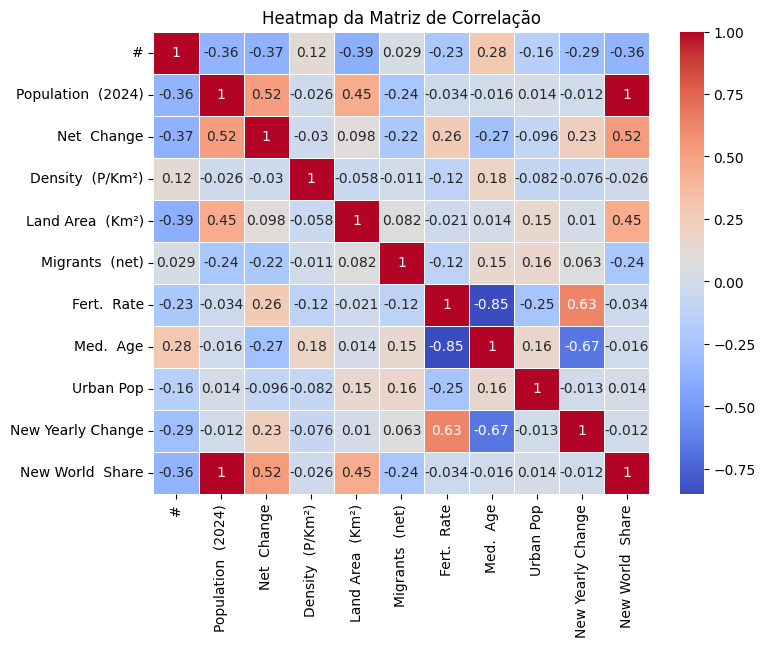

In [17]:
import seaborn as sns

corr = df.drop(columns=['Country (or dependency)']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

In [18]:
import numpy as np

p = np.max(corr[corr < 1])
var = []
corre = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if corr[i][j] == p:
                print([i, j])

['Population  (2024)', 'New World  Share']
['New World  Share', 'Population  (2024)']


In [19]:
p = np.min(corr)
var = []
corre = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if corr[i][j] == p:
                print([i, j])


['Fert.  Rate', 'Med.  Age']
['Med.  Age', 'Fert.  Rate']


Diante disso, a maior correlação é entre 'Population  (2024)', 'World  Share' e a menor, entre 'Med.  Age', 'Fert.  Rate'.